In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Training a neuron to compute AND function

Let us extend the neuron created in the previous section to compute an AND function. It now takes two inputs and tries to compute the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Since there are two inputs, we require two weights to compute the output:-

$$ a = \sigma(w_1x_1+w_2x_2+b)$$

Extending the formula from the previous section:-

$$\frac{\partial C}{\partial w_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_1$$

$$\frac{\partial C}{\partial w_2} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_2$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

Let us repeat the same process as before:-

## Initialization

In [7]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 0, 0, 1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

Again, let us compute the AND function using the initial parameters.

In [1]:
def print_error(w1, w2, b):
    print "Weight1: {0}; Weight2: {1}; Bias: {2}".format(w1, w2, b)
    
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        err = a-e
    
        print "Input1 = {0}; Input2 = {1}; Output = {2}; Expected = {3}; Error = {4}".format(x1, x2, a, e, err)
    
        error += err**2
    
    error /= 4

    print "Cost = {0}".format(error)
    
    x1 = np.arange(0, 1, 0.01)
    x2 = np.arange(0, 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(w1*X1 + w2*X2 + b)
    im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
    cset = plt.contour(Z, np.array([0.25, 0.5, 0.75]), extent=(0,1,0,1))
    plt.clabel(cset)
    plt.show()
    
print_error(w1, w2, b)

NameError: name 'w1' is not defined

Let us perform gradient descent:-

Del_w1 = 0.0120316705312; Del_w2 = 0.0169694601021; Del_b = 0.057135381697
New weight1 = 0.788631118161; New weight2 = 1.08069185766; New bias = -1.08436974986
Weight1: 0.788631118161; Weight2: 1.08069185766; Bias: -1.08436974986
Input1 = 0; Input2 = 0; Output = 0.252679973129; Expected = 0; Error = 0.252679973129
Input1 = 0; Input2 = 1; Output = 0.499080527986; Expected = 0; Error = 0.499080527986
Input1 = 1; Input2 = 0; Output = 0.426599539079; Expected = 0; Error = 0.426599539079
Input1 = 1; Input2 = 1; Output = 0.686746664434; Expected = 1; Error = -0.313253335566
Cost = 0.148260840305


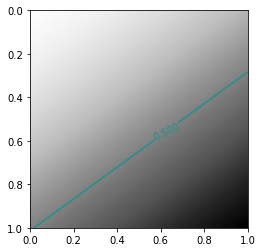

In [21]:
def improve_parameters(w1, w2, b):
    del_w1 = 0
    del_w2 = 0
    del_b = 0
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2

    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    return (del_w1, del_w2, del_b, error)

del_w1, del_w2, del_b, error = improve_parameters(w1, w2, b)
w1 -= del_w1
w2 -= del_w2
b -= del_b
print "Del_w1 = {0}; Del_w2 = {1}; Del_b = {2}".format(del_w1, del_w2, del_b)
print "New weight1 = {0}; New weight2 = {1}; New bias = {2}".format(w1, w2, b)

print_error(w1, w2, b)

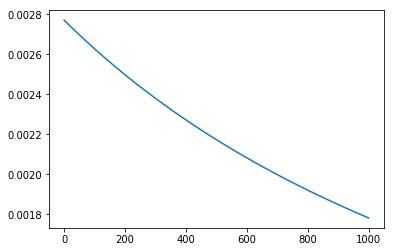

Weight1: 5.15830299412; Weight2: 5.1583030534; Bias: -7.83170435945
Input1 = 0; Input2 = 0; Output = 0.000396790855256; Expected = 0; Error = 0.000396790855256
Input1 = 0; Input2 = 1; Output = 0.0645612487255; Expected = 0; Error = 0.0645612487255
Input1 = 1; Input2 = 0; Output = 0.0645612451459; Expected = 0; Error = 0.0645612451459
Input1 = 1; Input2 = 1; Output = 0.923076570765; Expected = 1; Error = -0.0769234292354
Cost = 0.00356342015503


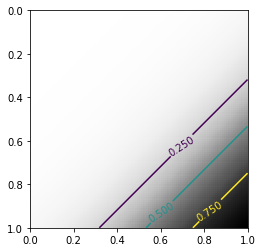

In [24]:
errors = []

for i in range(1000):
    del_w1, del_w2, del_b, error = improve_parameters(w1, w2,b)
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
    
    errors.append(error)
    
plt.plot(errors)
plt.show()

print_error(w1, w2, b)